In [7]:
import nannyml as nml
from IPython.display import display

reference, analysis, analysis_targets = nml.load_synthetic_car_loan_dataset()
display(reference.head())

,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,repaid,timestamp,y_pred_proba,y_pred
0,39811.0,40K - 60K €,0.632950,19.0,False,40%,0.212653,1.0,2018-01-01 00:00:00.000,0.99,1
1,12679.0,40K - 60K €,0.718627,7.0,True,10%,4.927549,0.0,2018-01-01 00:08:43.152,0.07,0
2,19847.0,40K - 60K €,0.721724,17.0,False,0%,0.520817,1.0,2018-01-01 00:17:26.304,1.00,1
3,22652.0,20K - 20K €,0.705992,16.0,False,10%,0.453649,1.0,2018-01-01 00:26:09.456,0.98,1
4,21268.0,60K+ €,0.671888,21.0,True,30%,5.695263,1.0,2018-01-01 00:34:52.608,0.99,1


In [8]:
from docs.utils import print_multi_index_markdown
print_multi_index_markdown(reference.head())

+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+-----------------+----------+-------------------------+----------------+----------+
|    | car_value   | salary_range   | debt_to_income_ratio   | loan_length   | repaid_loan_on_prev_car   | size_of_downpayment   | driver_tenure   | repaid   | timestamp               | y_pred_proba   | y_pred   |
+====+=============+================+========================+===============+===========================+=======================+=================+==========+=========================+================+==========+
| 0  | 39811       | 40K - 60K €    | 0.63295                | 19            | False                     | 40%                   | 0.212653        | 1        | 2018-01-01 00:00:00.000 | 0.99           | 1        |
+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+--------------

In [9]:
selected_columns = [
    'car_value', 'debt_to_income_ratio', 'driver_tenure'
]
calc = nml.SimpleStatsSumCalculator(
    column_names=selected_columns,
)

In [10]:
calc.fit(reference)
results = calc.calculate(analysis)
display(results.filter(period='all').to_df())

chunk                                                        \
              key chunk_index start_index end_index start_date end_date   
0        [0:4999]           0           0      4999       None     None   
1     [5000:9999]           1        5000      9999       None     None   
2   [10000:14999]           2       10000     14999       None     None   
3   [15000:19999]           3       15000     19999       None     None   
4   [20000:24999]           4       20000     24999       None     None   
5   [25000:29999]           5       25000     29999       None     None   
6   [30000:34999]           6       30000     34999       None     None   
7   [35000:39999]           7       35000     39999       None     None   
8   [40000:44999]           8       40000     44999       None     None   
9   [45000:49999]           9       45000     49999       None     None   
10       [0:4999]           0           0      4999       None     None   
11    [5000:9999]           1        5000      9999       None     None   
12  [10000:14999]           2       10000     14999       None     None   
13  [15000:19999]           3       15000     19999       None     None   
14  [20000:24999]           4       20000     24999       None     None   
15  [25000:29999]           5       25000     29999       None     None   
16  [30000:34999]           6       30000     34999       None     None   
17  [35000:39999]           7       35000     39999       None     None   
18  [40000:44999]           8       40000     44999       None     None   
19  [45000:49999]           9       45000     49999       None     None   

                 car_value                                         \
       period        value upper_threshold lower_threshold  alert   
0   reference  148302466.0    1.509662e+08    1.454805e+08  False   
1   reference  148088470.0    1.509662e+08    1.454805e+08  False   
2   reference  147887986.0    1.509662e+08    1.454805e+08  False   
3   reference  147290029.0    1.509662e+08    1.454805e+08  False   
4   reference  147182871.0    1.509662e+08    1.454805e+08  False   
5   reference  149716487.0    1.509662e+08    1.454805e+08  False   
6   reference  149591821.0    1.509662e+08    1.454805e+08  False   
7   reference  148628023.0    1.509662e+08    1.454805e+08  False   
8   reference  148665940.0    1.509662e+08    1.454805e+08  False   
9   reference  146879228.0    1.509662e+08    1.454805e+08  False   
10   analysis  149805851.0    1.509662e+08    1.454805e+08  False   
11   analysis  149380489.0    1.509662e+08    1.454805e+08  False   
12   analysis  149386503.0    1.509662e+08    1.454805e+08  False   
13   analysis  149918991.0    1.509662e+08    1.454805e+08  False   
14   analysis  146159141.0    1.509662e+08    1.454805e+08  False   
15   analysis  241891284.0    1.509662e+08    1.454805e+08   True   
16   analysis  245305975.0    1.509662e+08    1.454805e+08   True   
17   analysis  244072336.0    1.509662e+08    1.454805e+08   True   
18   analysis  245230366.0    1.509662e+08    1.454805e+08   True   
19   analysis  243531686.0    1.509662e+08    1.454805e+08   True   

   debt_to_income_ratio                                        driver_tenure  \
                  value upper_threshold lower_threshold  alert         value   
0           2925.393274     2954.473125     2901.888398  False  23080.717332   
1           2913.640626     2954.473125     2901.888398  False  23084.648323   
2           2931.718755     2954.473125     2901.888398  False  22858.100836   
3           2920.129452     2954.473125     2901.888398  False  23145.495315   
4           2928.742028     2954.473125     2901.888398  False  22973.516937   
5           2920.202634     2954.473125     2901.888398  False  23065.181019   
6           2939.179471     2954.473125     2901.888398  False  22850.042603   
7           2943.213805     2954.473125     2901.888398  False  22903.188078   
8           2924.528886     2954.473125   

In [11]:
print_multi_index_markdown(results.filter(period='all').to_df())

+----+---------------+-----------------+-----------------+---------------+----------------+--------------+------------+---------------+---------------------+---------------------+-----------+--------------------------+---------------------+---------------------+-----------+-------------------+---------------------+---------------------+-----------+
|    | | chunk       |                 |                 |               |                |              |            | | car_value   |                     |                     |           | | debt_to_income_ratio   |                     |                     |           | | driver_tenure   |                     |                     |           |
|    | | key         | | chunk_index   | | start_index   | | end_index   | | start_date   | | end_date   | | period   | | value       | | upper_threshold   | | lower_threshold   | | alert   | | value                  | | upper_threshold   | | lower_threshold   | | alert   | | value           | | u

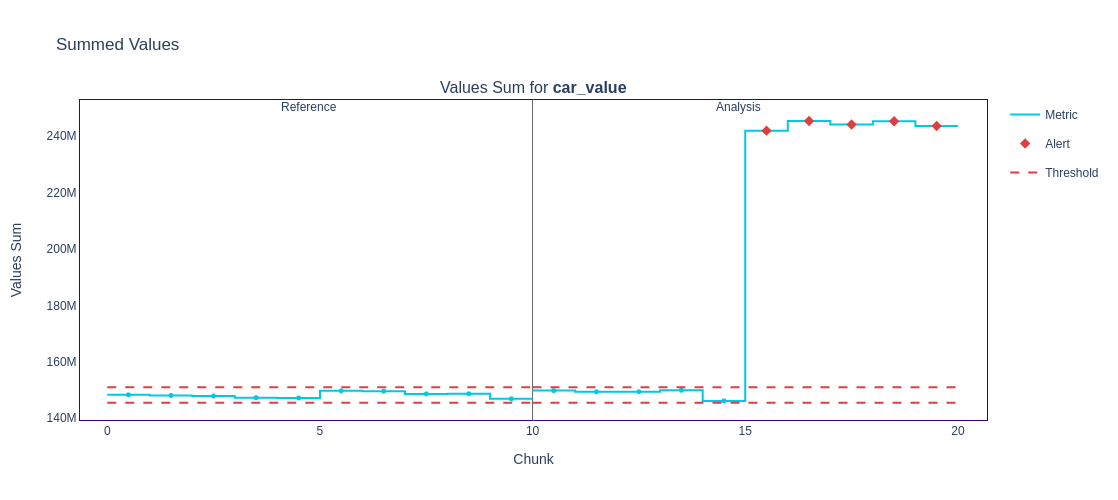

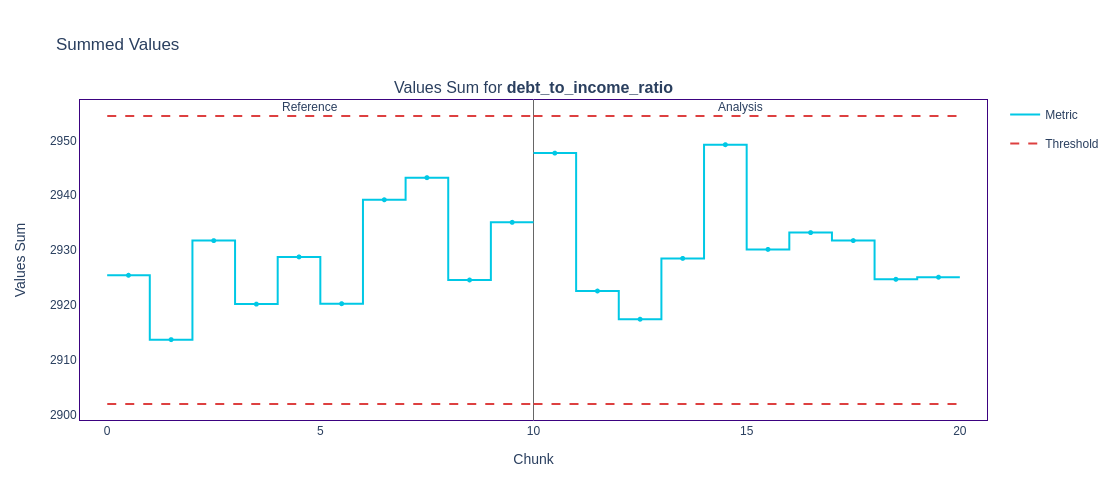

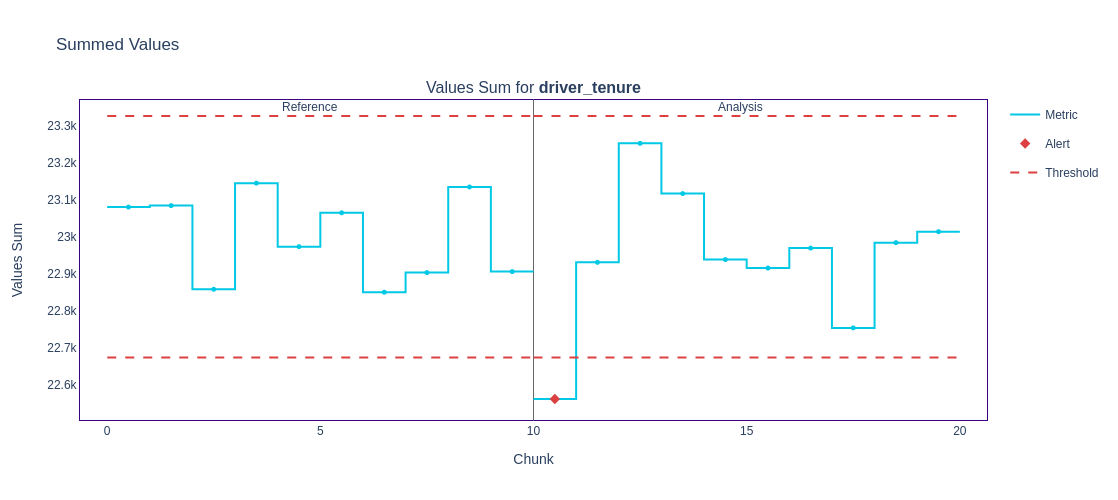

In [12]:
for column_name in results.column_names:
    results.filter(column_names=column_name).plot().show()